<a href="https://www.kaggle.com/code/mosesmoncy/amazon-review-sentiment-analysis?scriptVersionId=127051052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Amazon review sentiment analysis is the process of analyzing Amazon reviews and rating data to identify the emotions expressed in those reviews. It’s a common practice in customer experience (CX) analysis, especially when customer reviews are manually tagged or machine learning methods are applied for analysis.

Amazon review sentiment analysis is done using Natural Language Processing (NLP) techniques. NLP is a field of computer science that focuses on using computers to process natural language-based data. Amazon review sentiment analysis can evlaute the customer sentiment by extracting features from customer reviews, identify customer sentiment associated with those features, and appraising the overall customer sentiment expressed in customer reviews

Model is created to predict the overall reaction from the reviewer reaction ranging from 1.0 to 5.0 using Natural Language Processing(NLP).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # regular expression ==> used to remove special characters

In [2]:
a=pd.read_csv('/kaggle/input/amazon-review-dataset/amazon_reviews.csv',encoding='ISO-8859-1')
a

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [3]:
a.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
a.tail()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


In [5]:
a.shape

(4915, 12)

In [6]:
a.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [7]:
a.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

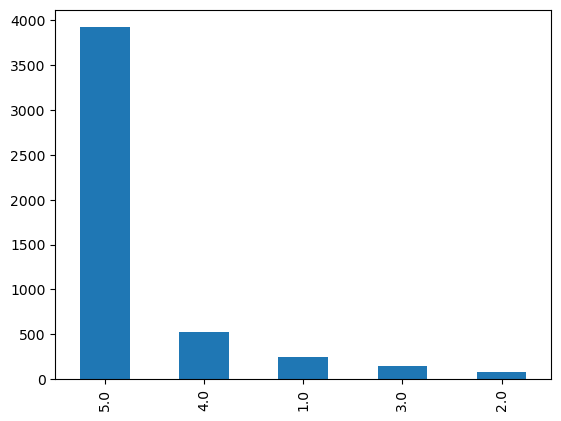

In [8]:
a['overall'].value_counts().plot(kind='bar')
a['overall'].value_counts()

In [9]:
# dropping irrelevant rows from 'target'

a.drop(a.index[(a['overall']=='Irrelevant')],axis=0,inplace=True)
a

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [10]:
#dropping 'id' and 'location'

a=a.drop(['Unnamed: 0', 'reviewerName', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],axis=1)
a

,overall,reviewText
0,4.0,No issues.
1,5.0,"Purchased this for my device, it worked as adv..."
2,4.0,it works as expected. I should have sprung for...
3,5.0,This think has worked out great.Had a diff. br...
4,5.0,"Bought it with Retail Packaging, arrived legit..."
...,...,...
4910,1.0,I bought this Sandisk 16GB Class 10 to use wit...
4911,5.0,Used this for extending the capabilities of my...
4912,5.0,Great card that is very fast and reliable. It ...
4913,5.0,Good amount of space for the stuff I want to d...


In [11]:
a.isna().sum()

overall       0
reviewText    1
dtype: int64

In [12]:
# preprocessing 'text'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [13]:
#There is a missing word in 'reviewText' 

a['reviewText']=a['reviewText'].fillna('Missing')

In [14]:
review=a.reviewText
review

0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [15]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
review=review.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  # lambda==> anonymous function
review

0                                             No issues .
1       Purchased this for my device , it worked as ad...
2       it works as expected . I should have sprung fo...
3       This think has worked out great.Had a diff . b...
4       Bought it with Retail Packaging , arrived legi...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable . It...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [16]:
# remove special characters
# we use re  ==> regular expression

review=review.str.replace('[^a-zA-Z-0-9]+',' ') # '+' is added because there could be combination of characters
review

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0                                              No issues 
1       Purchased this for my device it worked as adve...
2       it works as expected I should have sprung for ...
3       This think has worked out great Had a diff bra...
4       Bought it with Retail Packaging arrived legit ...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable It c...
4913    Good amount of space for the stuff I want to d...
4914    I ve heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [17]:
# remove special characters
# we use re  ==> regular expression

review=review.str.replace('[^a-zA-Z-0-9]+',' ') 
review

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0                                              No issues 
1       Purchased this for my device it worked as adve...
2       it works as expected I should have sprung for ...
3       This think has worked out great Had a diff bra...
4       Bought it with Retail Packaging arrived legit ...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable It c...
4913    Good amount of space for the stuff I want to d...
4914    I ve heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [18]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
review=review.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
review

0                                                 no issu
1       purchas this for my devic it work as advertis ...
2       it work as expect i should have sprung for the...
3       this think has work out great had a diff bran ...
4       bought it with retail packag arriv legit in a ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    use this for extend the capabl of my samsung g...
4912    great card that is veri fast and reliabl it co...
4913    good amount of space for the stuff i want to d...
4914    i ve heard bad thing about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [19]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
review=review.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
review

0                                                    issu
1       purchas devic work advertis never much phone m...
2       work expect sprung higher capac think made bit...
3       think work great diff bran 64gb card went sout...
4       bought retail packag arriv legit orang envelop...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspir 3 ...
4911    use extend capabl samsung galaxi note 10 great...
4912    great card veri fast reliabl come option adapt...
4913           good amount space stuff want fit gopro say
4914    heard bad thing 64gb micro sd card crap week s...
Name: reviewText, Length: 4915, dtype: object

In [20]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(review)
print(x)

  (0, 3060)	1.0
  (1, 1191)	0.49064662407693127
  (1, 5184)	0.33936914166352766
  (1, 3313)	0.24505445503111992
  (1, 1930)	0.3224025283239368
  (1, 4897)	0.2796289366059764
  (1, 3447)	0.17365811247535112
  (1, 4034)	0.1611320291222995
  (1, 3604)	0.24394901240676214
  (1, 3675)	0.2533393017988337
  (1, 742)	0.3195735967466774
  (1, 5962)	0.12024355345358399
  (1, 1819)	0.23130773256785153
  (1, 4286)	0.2280469276764232
  (2, 1059)	0.19558308647860448
  (2, 1443)	0.32094870614044374
  (2, 3304)	0.18905070592373602
  (2, 3926)	0.3467803781544687
  (2, 5771)	0.2101453577354851
  (2, 2004)	0.30830583861107086
  (2, 1406)	0.38704893657643574
  (2, 1110)	0.21879025580167819
  (2, 3348)	0.21879025580167819
  (2, 5399)	0.18832826730343225
  (2, 1312)	0.17592489551523147
  :	:
  (4913, 5032)	0.30227587716779536
  (4913, 5835)	0.33405459961757195
  (4913, 2589)	0.24776053253173141
  (4913, 5184)	0.4361285364209528
  (4914, 4911)	0.42378182597485314
  (4914, 5128)	0.33014816130849234
  (4914, 5

In [21]:
x.shape # 4915 sentences 6084 words

(4915, 6084)

In [22]:
y=a['overall'].values  
y

array([4., 5., 4., ..., 5., 5., 5.])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

<3440x6084 sparse matrix of type '<class 'numpy.float64'>'
	with 77251 stored elements in Compressed Sparse Row format>

In [24]:
y_train

array([5., 5., 5., ..., 4., 5., 4.])

<AxesSubplot:ylabel='overall'>

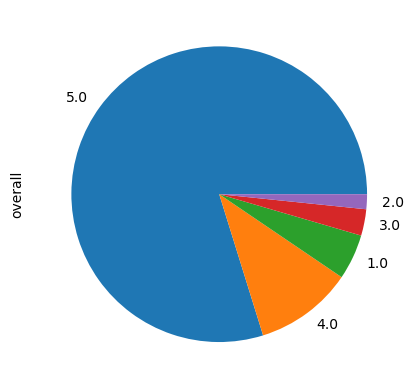

In [25]:
# plot a pie Chart for 'overall'

a['overall'].value_counts().plot(kind='pie')

In [26]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=MultinomialNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[  16    2    0    1   57]
 [   6    0    0    0   23]
 [   3    0    1    3   33]
 [   0    0    1    2  166]
 [   3    0    1    6 1151]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.7932203389830509
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

         1.0       0.57      0.21      0.31        76
         2.0       0.00      0.00      0.00        29
         3.0       0.33      0.03      0.05        40
         4.0       0.17      0.01      0.02       169
         5.0       0.80      0.99      0.89      1161

    accuracy                           0.79      1475
   macro avg       0.38      0.25      0.25      1475
weighted avg       0.69      0.79      0.72      1475

the classification details of model MultinomialNB() is below
the confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the classification details of model SVC() is below
the confusion matrix of  SVC() is
[[   9    0    0    0   67]
 [   2    0    0    0   27]
 [   2    0    0    0   38]
 [   0    0    0    0  169]
 [   0    0    0    0 1161]]
accuracy score of SVC() is
0.7932203389830509
the classification report of SVC() is
              precision    recall  f1-score   support

         1.0       0.69      0.12      0.20        76
         2.0       0.00      0.00      0.00        29
         3.0       0.00      0.00      0.00        40
         4.0       0.00      0.00      0.00       169
         5.0       0.79      1.00      0.89      1161

    accuracy                           0.79      1475
   macro avg       0.30      0.22      0.22      1475
weighted avg       0.66      0.79      0.71      1475



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the classification details of model DecisionTreeClassifier(criterion='entropy') is below
the confusion matrix of  DecisionTreeClassifier(criterion='entropy') is
[[ 32   2   4   5  33]
 [  9   2   2   3  13]
 [  7   3   2   4  24]
 [ 10   3   3  18 135]
 [ 21  10  21 116 993]]
accuracy score of DecisionTreeClassifier(criterion='entropy') is
0.7098305084745763
the classification report of DecisionTreeClassifier(criterion='entropy') is
              precision    recall  f1-score   support

         1.0       0.41      0.42      0.41        76
         2.0       0.10      0.07      0.08        29
         3.0       0.06      0.05      0.06        40
         4.0       0.12      0.11      0.11       169
         5.0       0.83      0.86      0.84      1161

    accuracy                           0.71      1475
   macro avg       0.30      0.30      0.30      1475
weighted avg       0.69      0.71      0.70      1475

the classification details of model RandomForestClassifier() is below
the 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
